In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/Jojo/Downloads/archive (3)/Breast_cancer_data.csv')

In [4]:
df.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()
#check for missing values, count them and print the sum for every column
df.isnull().sum() #conclusion :- there are no null values in this dataset

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [6]:
#replacing 0 values with median of that column
df['mean_radius']=df['mean_radius'].replace(0,df['mean_radius'].mean())#normal distribution
df['mean_texture']=df['mean_texture'].replace(0,df['mean_texture'].mean())#normal distribution
df['mean_perimeter']=df['mean_perimeter'].replace(0,df['mean_perimeter'].median())#skewed distribution
df['mean_area']=df['mean_area'].replace(0,df['mean_area'].median())#skewed distribution
df['mean_smoothness']=df['mean_smoothness'].replace(0,df['mean_smoothness'].median())#skewed distribution


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


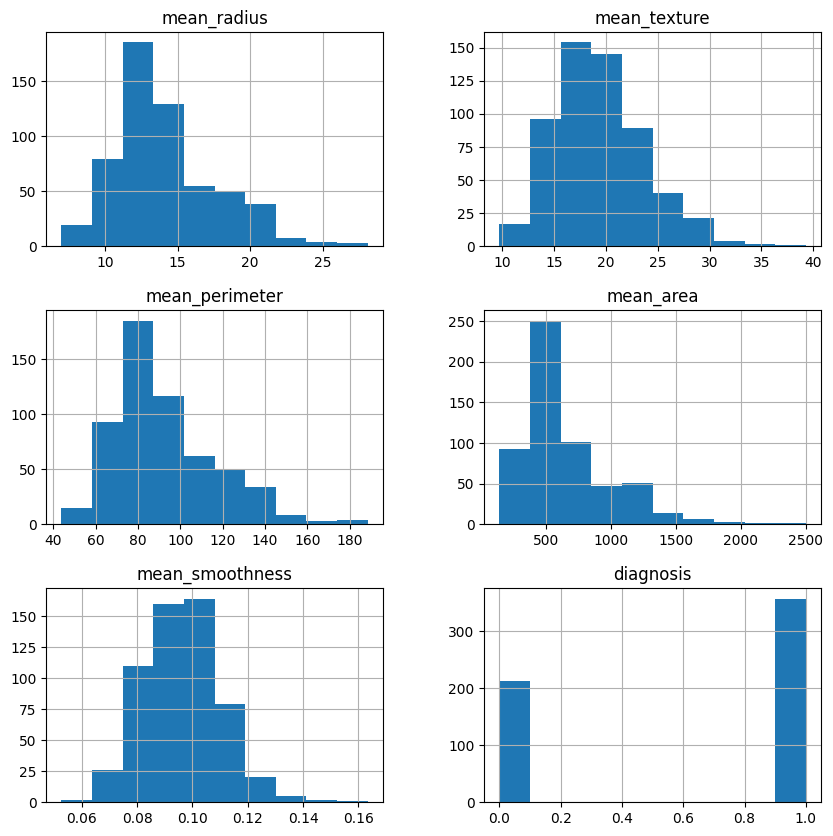

In [8]:
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: xlabel='mean_smoothness'>

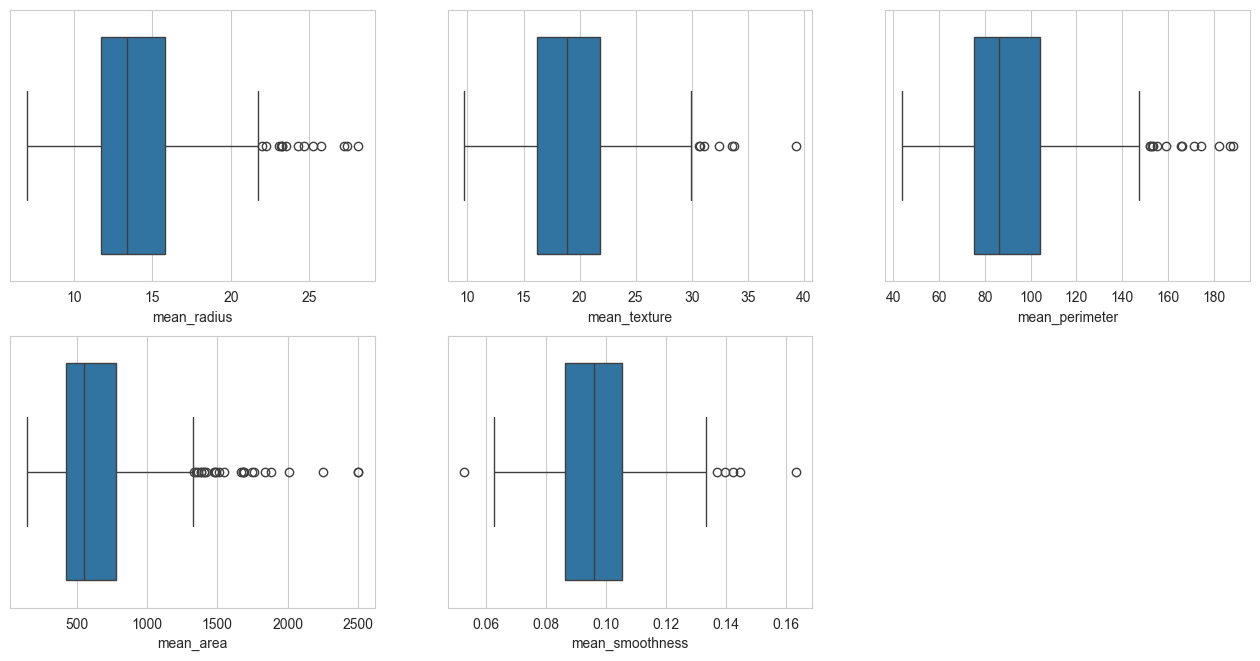

In [9]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='mean_radius',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='mean_texture',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mean_perimeter',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='mean_area',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='mean_smoothness',data=df)


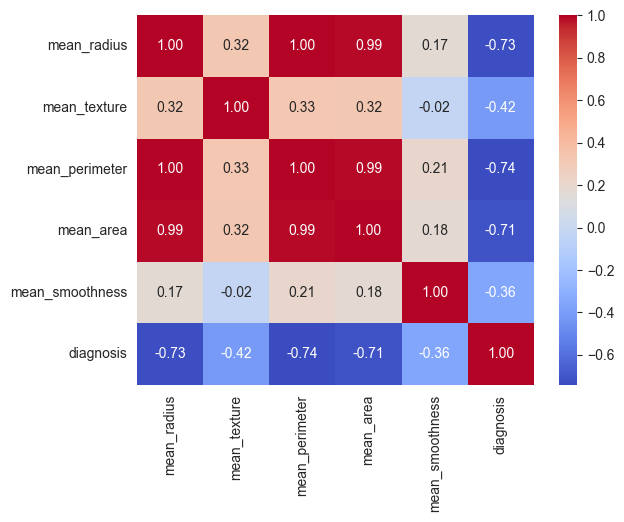

In [10]:
correlation_matrix = df.corr()

# Plotting the heatmap
hm = sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the plotted heatmap
plt.show()

In [11]:
df["diagnosis"].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [12]:
df_selected=df.drop(['mean_area'],axis='columns')

In [13]:

x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['mean_radius', 'mean_perimeter','mean_texture','mean_smoothness', 'diagnosis']
df_new.head()

,mean_radius,mean_perimeter,mean_texture,mean_smoothness,diagnosis
0,0.837148,0.001761,0.864437,0.945423,0.0
1,0.948944,0.390845,0.928697,0.218310,0.0
2,0.911972,0.696303,0.909331,0.839789,0.0
3,0.205986,0.639085,0.302817,0.996479,0.0
4,0.934859,0.110915,0.947183,0.627641,0.0


In [14]:
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df['diagnosis']


In [15]:
# Data Standardization
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [16]:
standardized_data = scaler.transform(X)

In [17]:
X= standardized_data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
print(X)

[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633]
 [ 1.82982061 -0.35363241  1.68595471  1.90870825 -0.82696245]
 [ 1.57988811  0.45618695  1.56650313  1.55888363  0.94221044]
 ...
 [ 0.70228425  2.0455738   0.67267578  0.57795264 -0.84048388]
 [ 1.83834103  2.33645719  1.98252415  1.73521799  1.52576706]
 [-1.80840125  1.22179204 -1.81438851 -1.34778924 -3.11208479]]


In [20]:
# Create a naive or baseline model (DummyClassifier in this case)
baseline_model = DummyClassifier(strategy="most_frequent")

# Train the model
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred).round(2)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
#print("Classification Report:\n", report)

Accuracy: 0.63


In [21]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(force_row_wise=True)
clf.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 249, number of negative: 149
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625628 -> initscore=0.513507
[LightGBM] [Info] Start training from score 0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

LGBMClassifier(force_row_wise=True)

In [22]:
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

LightGBM Model accuracy score: 0.9357
Training-set accuracy score: 1.0000


In [23]:
input_data = (17.99,10.38,122.80,1001.0,0.11840	)

In [24]:
# changing the input data to numpy array
input_data_as_np_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1, -1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)


prediction = clf.predict(std_data)
print(prediction)
if (prediction[0] == 0):
    print('Patient has a benign (non-cancerous) tumor')
else:
    print('Ptient has a malignant (cancerous) tumor.')

[0]
Patient has a benign (non-cancerous) tumor
